## Configuration

In [33]:
import spacy as spacy
import pprint
import matplotlib.pyplot as plt

from pathlib import Path
from gensim import corpora
from gensim import models
from gensim import similarities
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
from top2vec import Top2Vec

In [34]:
# This contains the processing pipeline
# As well as language-specific rules for tokenization etc.
nlp = spacy.load('en_core_web_lg')

In [35]:
# Import the documents
artificial_intelligence = Path('Text Files/artificial_intelligence.txt').read_text()
artificial_intelligence = artificial_intelligence.replace('\n', '')
artificial_intelligence_doc = nlp(artificial_intelligence)

cryptocurrencies = Path('Text Files/cryptocurrencies.txt').read_text()
cryptocurrencies = cryptocurrencies.replace('\n', '')
cryptocurrencies_doc = nlp(cryptocurrencies)

panama_papers = Path('Text Files/panama_papers.txt').read_text()
panama_papers = panama_papers.replace('\n', '')
panama_papers_doc = nlp(panama_papers)

sun_tzu_art_of_war_summary = Path('Text Files/sun_tzu_art_of_war_summary.txt').read_text()
sun_tzu_art_of_war_summary = sun_tzu_art_of_war_summary.replace('\n', '')
sun_tzu_art_of_war_summary_doc = nlp(sun_tzu_art_of_war_summary)

thomas_splint = Path('Text Files/thomas_splint.txt').read_text()
thomas_splint = thomas_splint.replace('\n', '')
thomas_splint_doc = nlp(thomas_splint)

document_corpus = [artificial_intelligence_doc, cryptocurrencies_doc, panama_papers_doc, sun_tzu_art_of_war_summary_doc, thomas_splint_doc]

## Pre-Processing

In [36]:
processed_document_corpus = []

for document in document_corpus:
    processed_document = []

    for token in document:
        if not nlp.vocab[token.text].is_stop and not nlp.vocab[token.text].is_punct and not nlp.vocab[token.text].like_num and not nlp.vocab[token.text].is_space and not nlp.vocab[token.text].is_bracket and not nlp.vocab[token.text].is_left_punct and not nlp.vocab[token.text].is_right_punct and not nlp.vocab[token.text].is_quote and not nlp.vocab[token.text].is_currency:
            processed_document.append(token.lemma_.lower())

    processed_document = ' '.join([i for i in processed_document])
    processed_document_corpus.append(processed_document)

print(processed_document_corpus[4])

war inspire advancement technology sector time essence problem identify government task bright mind formulate solution advancement sector bring progress innovation weaponry world war lead search well way care thousand severely injure man woman new heavy artillery rapid continuous firing machine gun cause carnage destroy flesh bone highly effective weapon cause medical profession respond challenge reverse disturb mortality rate early year world war soldier suffer broken femur thigh bone good endure incredible pain high probability infection wound extraction battlefield fracture compound bone pierce skin great chance die result blood loss infection horrendous condition western combat medic stretcher bearer struggle dress break leg transport patient line casualty clearing station treatment cause damage immense pain standard method splint fractured limb simple fast perform lot combat situation answer particular problem prove thomas splint appliance easy use highly effective thomas splint a

Note: while manually checking the processed documents, I noticed that some words stick together, don't know why though, will not inspect it for the time being.

### Stopwords

Here are a few key benefits of removing stopwords:

- On removing stopwords, dataset size decreases and the time to train the model also decreases
- Removing stopwords can potentially help improve the performance as there are fewer and only meaningful tokens left. Thus, it could increase classification accuracy
- Even search engines like Google remove stopwords for fast and relevant retrieval of data from the database

### Numbers

I also removed numbers/digits since they are not relevant for topic modeling.

### Punctuations, spaces, etc.

These are also not relevant, and they help remove a lot of unnecessary tokens that would be there otherwise.

### Lemmatizer

Not sure if this is the correct approach, since I didn't notice it in the documents that you provided to us,
but I thought it would make sense to convert the words to their base forms.

## Create a dictionary

In [37]:
# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.split()]
         for document in processed_document_corpus]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]

# Create a dictionary in which you associate each word in the corpus with a unique Integer ID
dictionary = corpora.Dictionary(processed_corpus)

In [38]:
print('In total we have {} words in the dictionary.\n\n{}'.format(len(dictionary.token2id), dictionary.token2id))

In total we have 630 words in the dictionary.

{'ability': 0, 'able': 1, 'account': 2, 'act': 3, 'action': 4, 'activity': 5, 'adapt': 6, 'advance': 7, 'advanced': 8, 'affect': 9, 'ai': 10, 'aid': 11, 'alexa': 12, 'algorithm': 13, 'amount': 14, 'answer': 15, 'appear': 16, 'application': 17, 'apply': 18, 'approach': 19, 'artificial': 20, 'assist': 21, 'assistant': 22, 'autonomous': 23, 'aware': 24, 'bank': 25, 'base': 26, 'beginning': 27, 'believe': 28, 'big': 29, 'calculate': 30, 'capacity': 31, 'car': 32, 'carry': 33, 'casualty': 34, 'cause': 35, 'chance': 36, 'character': 37, 'chess': 38, 'cognitive': 39, 'come': 40, 'common': 41, 'complex': 42, 'complicated': 43, 'computer': 44, 'consequence': 45, 'consider': 46, 'cross': 47, 'cut': 48, 'damage': 49, 'datum': 50, 'define': 51, 'design': 52, 'develop': 53, 'different': 54, 'divide': 55, 'drive': 56, 'drug': 57, 'e.g.': 58, 'earth': 59, 'easily': 60, 'easy': 61, 'embody': 62, 'enable': 63, 'end': 64, 'endless': 65, 'estimate': 66, 'exa

## Vectorize

In [39]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
pprint.pprint(bow_corpus)

[[(0, 2),
  (1, 2),
  (2, 2),
  (3, 1),
  (4, 4),
  (5, 4),
  (6, 4),
  (7, 1),
  (8, 2),
  (9, 1),
  (10, 25),
  (11, 1),
  (12, 2),
  (13, 2),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 6),
  (18, 2),
  (19, 1),
  (20, 22),
  (21, 3),
  (22, 2),
  (23, 2),
  (24, 3),
  (25, 1),
  (26, 4),
  (27, 1),
  (28, 3),
  (29, 1),
  (30, 2),
  (31, 1),
  (32, 7),
  (33, 2),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 4),
  (39, 3),
  (40, 1),
  (41, 1),
  (42, 2),
  (43, 1),
  (44, 5),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 4),
  (51, 3),
  (52, 2),
  (53, 2),
  (54, 4),
  (55, 1),
  (56, 5),
  (57, 1),
  (58, 2),
  (59, 1),
  (60, 2),
  (61, 2),
  (62, 2),
  (63, 1),
  (64, 2),
  (65, 1),
  (66, 1),
  (67, 5),
  (68, 1),
  (69, 1),
  (70, 4),
  (71, 1),
  (72, 2),
  (73, 1),
  (74, 1),
  (75, 2),
  (76, 1),
  (77, 1),
  (78, 2),
  (79, 1),
  (80, 1),
  (81, 3),
  (82, 4),
  (83, 1),
  (84, 2),
  (85, 3),
  (86, 1),
  (87, 3),
  (88, 1),
  (89, 2),
  (90, 1),
  (91, 

## Modeling

### LDA (Latent Dirichlet Allocation) Model

#### How does LDA (Latent Dirichlet Allocation) work ?

Latent Dirichlet Allocation (LDA) classifies or categorizes the text into a document and the words per topic,
these are modeled based on the Dirichlet distributions and processes.

The LDA makes two key assumptions:
- Documents are a mixture of topics, and
- Topics are a mixture of tokens (or words)

And, these topics using the probability distribution generate the words.
In statistical language, the documents are known as the probability density (or distribution) of topics and the topics are the probability density (or distribution) of words.

For more in-depth explanation: [https://www.analyticsvidhya.com/blog/2021/06/part-2-topic-modeling-and-latent-dirichlet-allocation-lda-using-gensim-and-sklearn/](https://www.analyticsvidhya.com/blog/2021/06/part-2-topic-modeling-and-latent-dirichlet-allocation-lda-using-gensim-and-sklearn/)

#### Hyperparameter testing

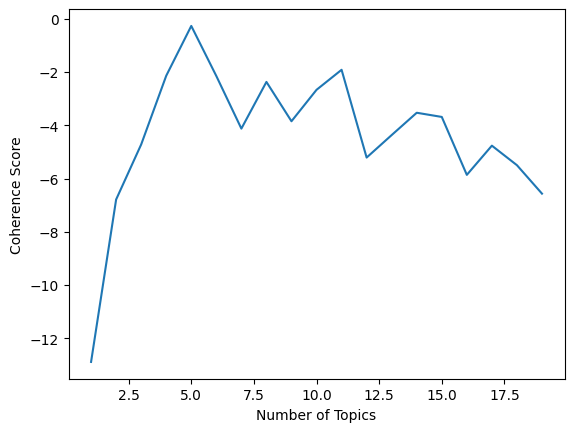

In [40]:
topics = []

score = []

for i in range(1,20,1):
    lda_model = LdaMulticore(corpus=bow_corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
    cm = CoherenceModel(model=lda_model, corpus=bow_corpus, dictionary=dictionary, coherence='u_mass')
    topics.append(i)
    score.append(cm.get_coherence())

plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

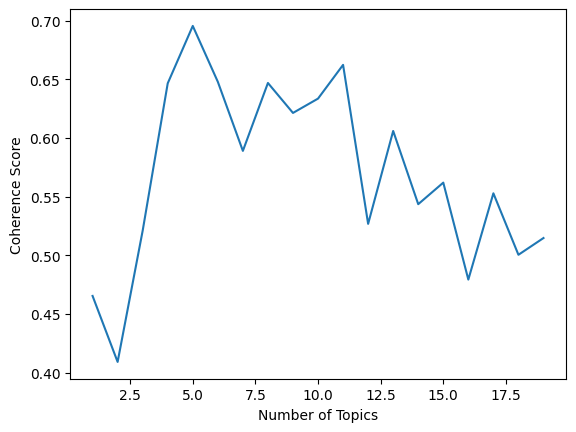

In [41]:
topics = []

score = []

for i in range(1,20,1):
    lda_model = LdaMulticore(corpus=bow_corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
    cm = CoherenceModel(model=lda_model, texts = texts, corpus=bow_corpus, dictionary=dictionary, coherence='c_v')
    topics.append(i)
    score.append(cm.get_coherence())

plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

The coherence score for C_v ranges from 0 (complete incoherence) to 1 (complete coherence).
Values above 0.5 are fairly good, according to John McLevey (source: Doing Computational Social Science: A Practical Introduction By John McLevey)

So, based on the plot charts above, I decided to try the model with two 'num_topics' values (3 and 13).

#### Fitting the model

In [42]:
lda_model_1 = LdaMulticore(corpus=bow_corpus, id2word=dictionary, iterations=100, num_topics=3, workers = 4, passes=100)
lda_model_2 = LdaMulticore(corpus=bow_corpus, id2word=dictionary, iterations=100, num_topics=13, workers = 4, passes=100)

##### Most important words for each topic

In [43]:
print('Results for num_topic 3\n')
lda_model_1.print_topics(-1)

Results for num_topic 3



[(0,
  '0.019*"company" + 0.013*"datum" + 0.013*"offshore" + 0.012*"mossack" + 0.011*"fonseca" + 0.011*"document" + 0.010*"world" + 0.010*"leaks" + 0.010*"süddeutsche" + 0.010*"journalist"'),
 (1,
  '0.026*"enemy" + 0.018*"sun" + 0.017*"army" + 0.017*"war" + 0.017*"tzu" + 0.015*"battle" + 0.012*"time" + 0.012*"force" + 0.012*"commander" + 0.011*"know"'),
 (2,
  '0.021*"ai" + 0.020*"intelligence" + 0.018*"transaction" + 0.018*"cryptocurrency" + 0.018*"artificial" + 0.018*"proof" + 0.014*"crypto" + 0.013*"human" + 0.013*"system" + 0.011*"machine"')]

In [44]:
print('Results for num_topic 13\n')
lda_model_2.print_topics(-1)

Results for num_topic 13



[(0,
  '0.002*"proof" + 0.002*"crypto" + 0.002*"cryptocurrency" + 0.002*"transaction" + 0.002*"ai" + 0.002*"official" + 0.002*"office" + 0.002*"munich" + 0.002*"name" + 0.002*"mossfon"'),
 (1,
  '0.002*"ai" + 0.002*"intelligence" + 0.002*"mossfon" + 0.002*"munich" + 0.002*"name" + 0.002*"office" + 0.002*"official" + 0.002*"offshore" + 0.002*"organization" + 0.002*"mossack"'),
 (2,
  '0.002*"proof" + 0.002*"transaction" + 0.002*"cryptocurrency" + 0.002*"crypto" + 0.002*"office" + 0.002*"name" + 0.002*"mossack" + 0.002*"munich" + 0.002*"mossfon" + 0.002*"offshore"'),
 (3,
  '0.025*"enemy" + 0.021*"war" + 0.017*"sun" + 0.017*"army" + 0.015*"tzu" + 0.014*"battle" + 0.013*"time" + 0.011*"soldier" + 0.011*"force" + 0.011*"commander"'),
 (4,
  '0.002*"organization" + 0.002*"owner" + 0.002*"mossfon" + 0.002*"munich" + 0.002*"name" + 0.002*"office" + 0.002*"official" + 0.002*"offshore" + 0.002*"month" + 0.002*"own"'),
 (5,
  '0.045*"ai" + 0.043*"intelligence" + 0.040*"artificial" + 0.027*"human

#### Testing similarity

Documents are in alphabetical order, the same way they are stored in the 'Text Files' directory.

#0 - Artificial Intelligence
#1 - Cryptocurrencies
#2 - Panama Papers
#3 - Sun Tzu Art Of War
#4 - Thomas Splint

In [45]:
print('Based on the LDA model with 3 num_topic\'s\n')

for i in range(len(processed_document_corpus)):
    result = lda_model_1[bow_corpus[i]]
    print('Document #{} is the most similar to topic #{} with {} accuracy.\n'.format(i, result[0][0], result[0][1]))

Based on the LDA model with 3 num_topic's

Document #0 is the most similar to topic #2 with 0.9986283183097839 accuracy.

Document #1 is the most similar to topic #2 with 0.9986067414283752 accuracy.

Document #2 is the most similar to topic #0 with 0.9986304640769958 accuracy.

Document #3 is the most similar to topic #1 with 0.9992265701293945 accuracy.

Document #4 is the most similar to topic #0 with 0.9966548085212708 accuracy.



In [46]:
print('Based on the LDA model with 13 num_topic\'s\n')

for i in range(len(processed_document_corpus)):
    result = lda_model_2[bow_corpus[i]]
    print('Document #{} is the most similar to topic #{} with {} accuracy.\n'.format(i, result[0][0], result[0][1]))

Based on the LDA model with 13 num_topic's

Document #0 is the most similar to topic #5 with 0.9981899857521057 accuracy.

Document #1 is the most similar to topic #9 with 0.9981575012207031 accuracy.

Document #2 is the most similar to topic #9 with 0.014209265820682049 accuracy.

Document #3 is the most similar to topic #3 with 0.9989719986915588 accuracy.

Document #4 is the most similar to topic #3 with 0.9958416223526001 accuracy.



13 number topics seem to be a better option.

In [47]:
lda_query = "broken leg medicine"
vec_bow = dictionary.doc2bow(lda_query.lower().split())
vec_lda = lda_model_2[vec_bow]  # convert the query to LSI space
print(vec_lda)

[(0, 0.03846403), (1, 0.03846403), (2, 0.03846403), (3, 0.53843164), (4, 0.03846403), (5, 0.03846403), (6, 0.03846403), (7, 0.03846403), (8, 0.03846403), (9, 0.03846403), (10, 0.03846403), (11, 0.03846403), (12, 0.03846403)]


Based on our LDA model, the query belongs to every topic.
But topic 1 takes up the majority - 53%.

In [48]:
lda_model_2.print_topics()[4]

(4,
 '0.002*"organization" + 0.002*"owner" + 0.002*"mossfon" + 0.002*"munich" + 0.002*"name" + 0.002*"office" + 0.002*"official" + 0.002*"offshore" + 0.002*"month" + 0.002*"own"')

(-0.5, 399.5, 199.5, -0.5)

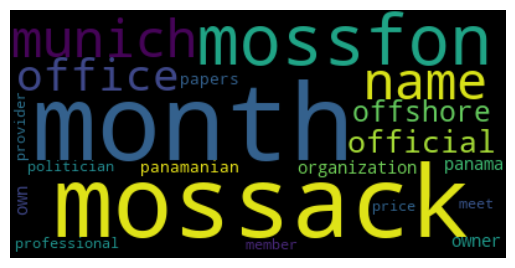

In [49]:
from wordcloud import WordCloud

plt.imshow(WordCloud().fit_words(dict(lda_model_2.show_topic(4, 20))), interpolation='bilinear')
plt.axis('off')

### LSA Model

#### How does LSA (Latent Semantic Analysis) work ?

Latent Semantic Analysis is a natural language processing method that analyzes relationships between a set of documents and the terms contained within.
It uses singular value decomposition, a mathematical technique, to scan unstructured data to find hidden relationships between terms and concepts.

LSA is primarily used for concept searching and automated document categorization.
However, it’s also found use in software engineering (to understand source code), publishing (text summarization), search engine optimization, and other applications.

For more in-depth explanation: [https://youtu.be/OvzJiur55vo](https://youtu.be/OvzJiur55vo)

#### Hyperparameter testing

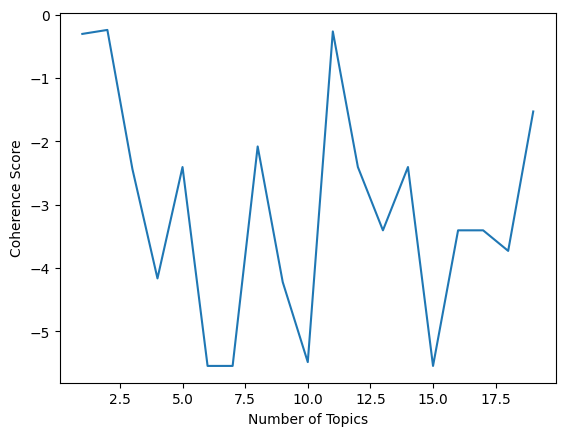

In [50]:
topics = []

score = []

for i in range(1,20,1):
    lsi_model = models.LsiModel(corpus=bow_corpus, id2word=dictionary, num_topics=i)
    cm = CoherenceModel(model=lsi_model, corpus=bow_corpus, dictionary=dictionary, coherence='u_mass')
    topics.append(i)
    score.append(cm.get_coherence())

plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

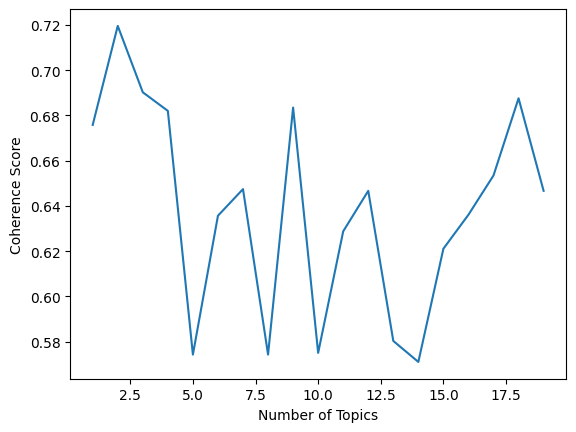

In [51]:
topics = []

score = []

for i in range(1,20,1):
    lsi_model = models.LsiModel(corpus=bow_corpus, id2word=dictionary, num_topics=i)
    cm = CoherenceModel(model=lsi_model, texts = texts, corpus=bow_corpus, dictionary=dictionary, coherence='c_v')
    topics.append(i)
    score.append(cm.get_coherence())

plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

Based on the graphs, I will take 8 number of topics.

#### Fitting the model

In [52]:
lsi_model = models.LsiModel(bow_corpus, id2word=dictionary, num_topics=8)

Let's check the SVD.

In [53]:
lsi_model.get_topics()

array([[ 1.70928277e-02,  1.80177314e-02,  4.35608438e-02, ...,
         7.39922993e-03,  1.84980748e-03,  1.84980748e-03],
       [-2.95909780e-02, -3.01295022e-02, -3.56460482e-02, ...,
        -4.30819348e-03, -1.07704837e-03, -1.07704837e-03],
       [-1.61676656e-02, -1.63326686e-02, -3.95944671e-03, ...,
        -1.32002409e-03, -3.30006023e-04, -3.30006023e-04],
       [ 9.97564626e-03,  9.80804086e-03,  1.55518482e-02, ...,
        -1.34084322e-03, -3.35210805e-04, -3.35210805e-04],
       [-6.84789867e-03,  3.58972993e-02, -1.35021923e-02, ...,
         3.41961584e-01,  8.54903960e-02,  8.54903960e-02]])

And this indeed makes sense, the LSA model created a similarity matrix with all the words from our dictionary, hence the 630 columns.

This represents, the strength of each term from the dictionary in relation to the document.

![image](Images/chrome_TEJYtU71m0.jpg)

#### Testing the similarity

In [54]:
lsi_query = "broken leg medicine"
vec_bow = dictionary.doc2bow(lsi_query.lower().split())
vec_lsi = lsi_model[vec_bow]  # convert the query to LSI space
print(vec_lsi)

[(0, 0.002774711224617015), (1, -0.0016155725543221767), (2, -0.0004950090347248906), (3, -0.0005028162073536797), (4, 0.12823559401346415)]


In [55]:
lsi_index = similarities.MatrixSimilarity(lsi_model[bow_corpus])  # transform corpus to LSI space and index it

In [56]:
sims = lsi_index[vec_lsi]  # perform a similarity query against the corpus
print(list(enumerate(sims)))  # print (document_number, document_similarity) 2-tuples

[(0, 1.8626451e-09), (1, 9.313226e-10), (2, 0.0), (3, 0.0), (4, 0.9736034)]


Cosine measure returns similarities in the range <-1, 1> (the greater, the more similar), so that the first document has a score of 0.99809301 etc.

Based on this we can say that document #4 is the most fitting for our query.
But which document is this exactly ?

In [57]:
print(document_corpus[4])

War has inspired many advancements in technology across several sectors. As time is always of the essence, when problems are identified governments task their brightest minds with formulating solutions. Advancements in one sector may bring about progress in another. The innovations in weaponry in World War One led to a search for better ways to care for thousands of severely injured men and women.The new heavy artillery and rapid, continuous firing machine guns caused much carnage, destroying flesh and bone. These highly effective weapons caused our medical profession to respond to the challenge of reversing disturbing mortality rates.In the early years of World War One, if a soldier suffered a broken femur (thigh bone), at best, he would endure incredible pain and a high probability of infection of his wounds during his extraction from the battlefield. If the fracture was compound (where the bone pierces the skin), there was a greater than 80% chance they would die from the resulting 

### Top2Vec model

#### How does Top2Vec work ?

Top2Vec is an algorithm that detects topics present in the text and generates jointly embedded topic, document, and word vectors.
At a high level, the algorithm performs the following steps to discover topics in a list of documents.

- Generate embedding vectors for documents and words.
- Perform dimensionality reduction on the vectors using an algorithm such as UMAP.
- Cluster the vectors using a clustering algorithm such as HDBSCAN.
- Assign topics to each cluster.

For more in-depth explanation: [https://towardsdatascience.com/how-to-perform-topic-modeling-with-top2vec-1ae9bb4e89dc](https://towardsdatascience.com/how-to-perform-topic-modeling-with-top2vec-1ae9bb4e89dc)

#### Fitting the model

Since I couldn't use my own documents for the Top2Vec model, I resorted to the 'fetch_20newsgroups' dataset by sklearn.

We first start off by training the Top2Vec model on the 'fetch_20newsgroups' dataset...

In [58]:
# UserWarning: n_neighbors is larger than the dataset size;
# A min_count of 50 results in all words being ignored, choose a lower value.
# top_2_vec_model = Top2Vec(processed_document_corpus, workers=4, embedding_model='universal-sentence-encoder')

from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

top_2_vec_model = Top2Vec(documents=newsgroups.data, speed='learn', workers=4)

2022-11-06 22:50:46,919 - top2vec - INFO - Pre-processing documents for training
2022-11-06 22:50:55,077 - top2vec - INFO - Creating joint document/word embedding
2022-11-06 22:53:12,759 - top2vec - INFO - Creating lower dimension embedding of documents
2022-11-06 22:53:19,127 - top2vec - INFO - Finding dense areas of documents
2022-11-06 22:53:20,515 - top2vec - INFO - Finding topics


In [59]:
top_2_vec_model.get_num_topics()

117

It looks like the model found 117 topics in the data given.

#### Search for the most similar documents by topic

First we find the topic id most similar to the word 'medicine'.

In [60]:
topic_words, word_scores, topic_scores, topic_nums = top_2_vec_model.search_topics(keywords=['medicine'], num_topics=5)

most_similar_topic = topic_nums[0]

for i in range(len(topic_nums)):
    print('Topic ID: {}\nScore: {}\n\n'.format(topic_nums[i], topic_scores[i]))

Topic ID: 4
Score: 0.45098023152934846


Topic ID: 88
Score: 0.35807484779240384


Topic ID: 85
Score: 0.24572645741412164


Topic ID: 49
Score: 0.20179103492147818


Topic ID: 75
Score: 0.19125355593167936




Apparently topic with the id 4 is the most similar topic to the word 'medicine', with a cosine similarity of 0.4509.

Ranked from least similar (0), to most similar (1).

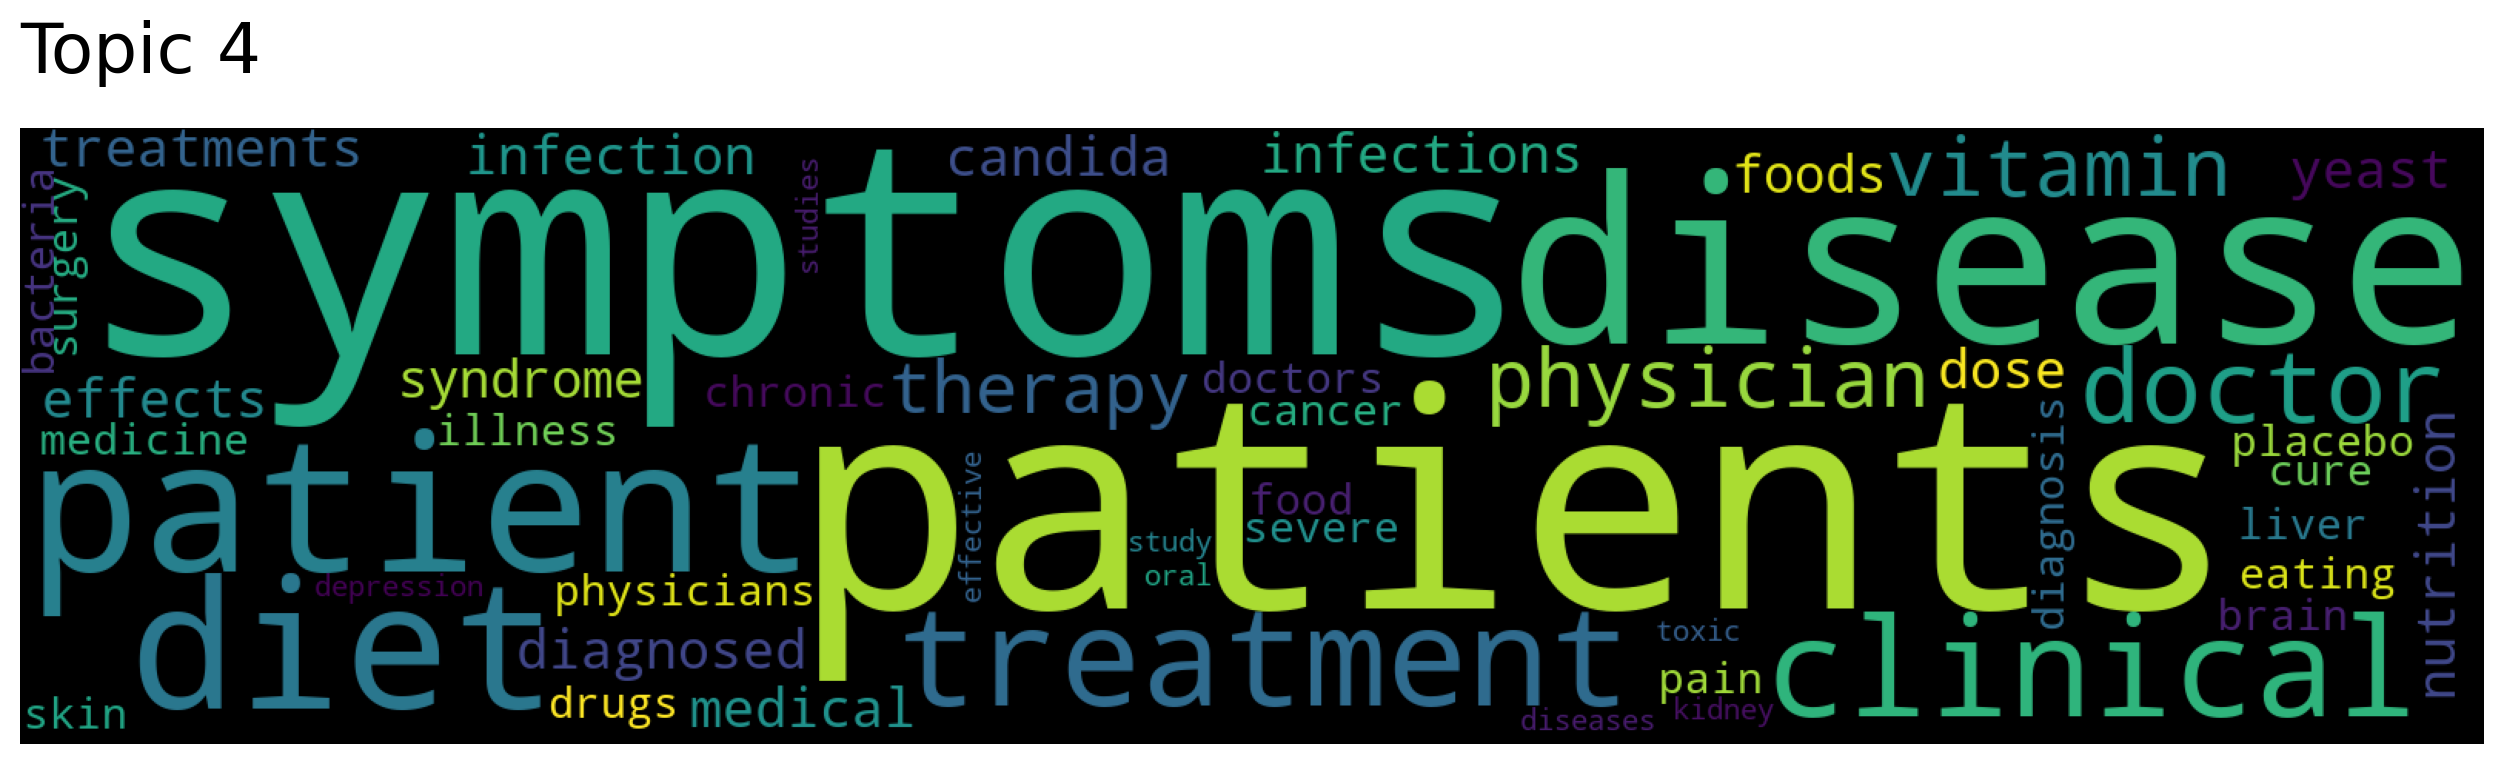

In [61]:
top_2_vec_model.generate_topic_wordcloud(most_similar_topic)

# or
# topic_words[0]

Let's now search for the document which is most similar to this topic.

In [62]:
documents, document_scores, document_ids = top_2_vec_model.search_documents_by_topic(topic_num=9, num_docs=5)

for document, document_score, document_id in zip(documents, document_scores, document_ids):
    print('Document: {}, Score: {}'.format(document_id, document_score))
    print('-----------')
    print(document)
    print('-----------\n\n')

Document: 8433, Score: 0.6967614889144897
-----------
Arab citizens have the all the same rights as Jews.  Arabs are
exempt from military service, but that is about it.  Arabs have a
full voice in Israeli politics, to the degree that they choose to
get involved.  They may vote.  There are Arabs in the Cabinet.  
-----------


Document: 15263, Score: 0.6952462792396545
-----------


They certainly are until the Arabs make peace.  Only the most leftist/Arabist
lunatics call upon Israel to withdraw now.  Most moderates realize that an 
Israeli withdrawl will be based on the Camp David/242/338/Madrid formulas
which make full peace a prerequisite to territorial concessions.

-----------


Document: 9126, Score: 0.6727332472801208
-----------


I wouldn't bet on it.

Arab governments generally don't care much about the Palestineans and
their struggle but find it useful for political purposes back home.
They are happy to leave the Palestineans largely under Israeli control
because that leaves

#### Search for the most similar document based on keywords

I later found out, that you can also search for topics by keywords.

But they have to be learned by the model in order to be able to make a search on them.

In [63]:
words, word_scores = top_2_vec_model.similar_words(keywords=['cars'], keywords_neg=[], num_words=5)

for word, score in zip(words, word_scores):
    print('Word: {}, Score: {}\n'.format(word, score))

Word: car, Score: 0.7248082473299953

Word: toyota, Score: 0.594795061880603

Word: ford, Score: 0.5492395758967336

Word: honda, Score: 0.5407808276892532

Word: wheel, Score: 0.4619619382624768



In [64]:
documents, document_scores, document_ids = top_2_vec_model.search_documents_by_keywords(keywords=['toyota', 'car'], num_docs=5)

for document, document_score, document_id in zip(documents, document_scores, document_ids):
    print('Document: {}, Score: {}'.format(document_id, document_score))
    print('-----------')
    print(document)
    print('-----------\n\n')

Document: 4110, Score: 0.6134346127510071
-----------
PLEASE DO NOT RESPOND DIRECTLY TO THIS ACCOUNT

FOR SALE:

Blue 1984 Toyota pickup truck with white blazer topper, AM/FM/Casette,
A/C, cruise control.  Great for camping trips.

New: brakes, master brake cylinder, Michelin tires, shocks,
maintenance free battery, clutch, windshield wipers.

Well maintained with all Toyota parts (all repairs done at the
dealers.)  Very little rust, body in good shape.  

126K miles

Asking $2800.  If interested, please contact:

   Ursula Fritsch
   umf@gene.com
   (415)-347-6813

	    PLEASE DO NOT RESPOND DIRECTLY TO THIS ACCOUNT

-----------


Document: 9726, Score: 0.5991767644882202
-----------
1990 Mazda 626 DX       $6000 or best offer
NADA blue book: $9075 - $2175 for mileage = $6900
e-mail or call Ron at (908)805-2248 (work) or (908)454-9337 (home)

* 92,000 miles, all highway (I used to commute 160 miles/day)
* 5 speed
* Air Conditioning
* AM/FM/Cassette stereo
* split fold-down rear seat
*